In [19]:
from Game import Kalaha
from Agent import Agent
import time
import matplotlib.pyplot as plt

## Execution Time

This section explores how long it takes to search through the game states at different depths 

* Iterates over a range, and outputs the execution time of those depths

In [30]:
AI = Agent()

depth = []
timings = []
for i in range(0, 9, 1):
    game = Kalaha()
    AI.search_depth = i
    start = time.time()
    
    AI.find_next_move(game)

    end = time.time()
    
    depth.append(i)
    timings.append(round(end - start, 2))
    

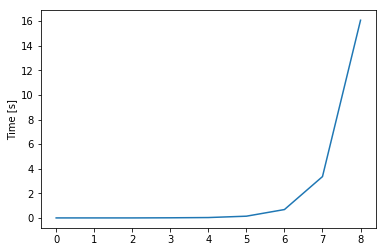

Depth: 0  Time: 0.0 s
Depth: 1  Time: 0.0 s
Depth: 2  Time: 0.0 s
Depth: 3  Time: 0.01 s
Depth: 4  Time: 0.03 s
Depth: 5  Time: 0.14 s
Depth: 6  Time: 0.68 s
Depth: 7  Time: 3.36 s
Depth: 8  Time: 16.07 s


In [31]:
plt.plot(depth, timings)
plt.ylabel('Time [s]')
plt.show()
for i, timing in enumerate(timings): 
    print("Depth: {}  Time: {} s".format(i, timing))